In [46]:
file_name = '1.training_report_english'

In [47]:
with open(f'../report/{file_name}.txt') as f:
    lines = f.readlines()
    lines = [line[:-2] for line in lines]
lines

['Epoch:  0 | Smooth Loss: 0.3532: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 350/350 [09:35<00:00,  1.64s/it, Dev Acc:91.07(max:92.23) Dev F1:84.83(max:87.21)',
 'Epoch:  1 | Smooth Loss: 0.2840: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 350/350 [09:12<00:00,  1.58s/it, Dev Acc:91.24(max:92.40) Dev F1:85.50(max:87.41)',
 'Epoch:  2 | Smooth Loss: 0.2359: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 350/350 [09:20<00:00,  1.60s/it, Dev Acc:91.24(max:92.40) Dev F1:85.79(max:87.41)',
 'Epoch:  3 | Smooth Loss: 0.2030: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 350/350 [09:21<00:00,  1.60s/it, Dev Acc:91.74(max:92.40) Dev F1:86.02(max:87.41)',
 'Epoch:  4 | Smooth Loss: 0.1776: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 350/350 [09:21<00:00,  1.60s/it, Dev Acc:90.91(max:92.40) Dev F1:85.23(max:87.41)',
 'Epoch:  5 | Smooth Loss: 0.1590: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 350/350 [09:20<00:00,  1.60s/it, Dev Acc:90.83(max:92.40) Dev F1:83.97(max:87.41)',
 'Epoch:  6 | Smooth Loss: 0.1458: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ

In [48]:
def get_smooth_loss(line):
    return line[25:31]

def get_val_acc(line):
    return line[111:116]

def get_val_f1(line):
    return line[135:140]

In [49]:
list = []
for line in lines:
    list.append([get_smooth_loss(line), get_val_acc(line), get_val_f1(line)])

import pandas as pd
df = pd.DataFrame(list, columns=['smooth_loss', 'val_acc', 'val_f1'], dtype=float)

In [53]:
# save the dataframe
df.to_csv(f'../report/{file_name}-metrics_report.csv', index=False)

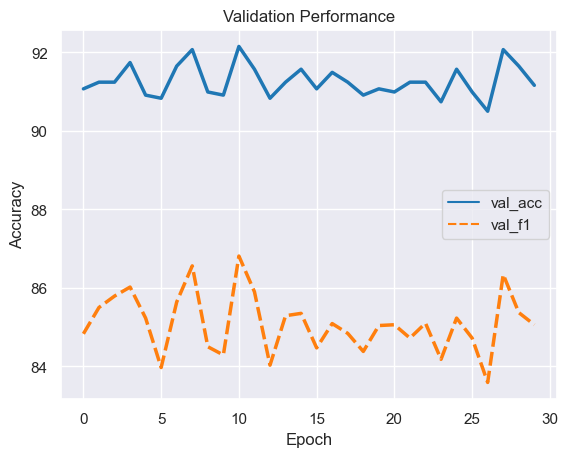

<Figure size 640x480 with 0 Axes>

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.lineplot(data=df[['val_acc', 'val_f1']], palette="tab10", linewidth=2.5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Performance')
plt.show()
plt.savefig(f'../report/{file_name}-validation_performance.png')


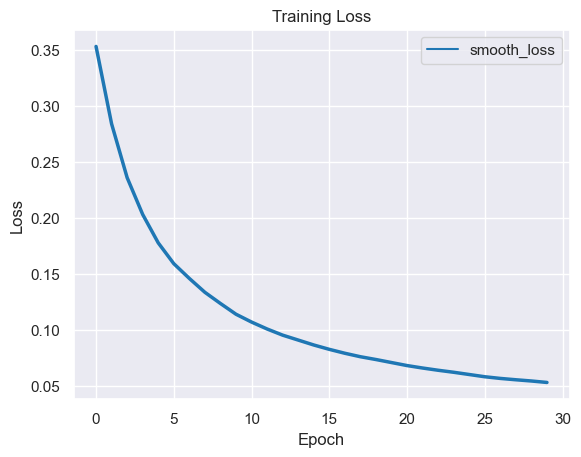

<Figure size 640x480 with 0 Axes>

In [52]:
# visualize the loss
sns.set_theme(style="darkgrid")
sns.lineplot(data=df[['smooth_loss']], palette="tab10", linewidth=2.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
plt.savefig(f'../report/{file_name}-training_loss.png')